## Imports and Setup

In [ ]:
import os 
os.chdir('/home/itingzon.unicef/giga')
from utils import plot_utils
from utils import config_utils

%load_ext autoreload
%autoreload 2

## Load Config Files

In [8]:
iso_code = "SEN"
data_config_file = os.path.join(os.getcwd(), "configs/data_configs/data_config_ISO_AF.yaml")
model_config_file = os.path.join(os.getcwd(), "configs/best_models.yaml")
data_config = config_utils.load_config(data_config_file)
model_config = config_utils.load_config(model_config_file)

## Load Data

In [9]:
model_config = config_utils.load_config(model_config_file)
master = plot_utils.read_file(iso_code, model_config, source="master")
preds = plot_utils.read_file(iso_code, model_config, source="preds")
print(preds.shape)
preds.head(2)

(15203, 13)


,prob,UID,sum,group,ADM1,ADM2,ADM3,PUID,distance_to_nearest_master,MUID,distance_to_nearest_osm_overture,SUID,geometry
0,0.966634,23507,22.0,8567,Diourbel,Diourbel,Ndindy,Diourbel_23507,23.830582,UNICEF-SEN-SCHOOL-00006044,20329.970076,OSM-SEN-SCHOOL-00000627,POINT (-16.30077 14.79800)
1,0.966054,178498,15.0,14124,Ziguinchor,Bignona,Sindian,Bignona_178498,18.696889,UNICEF-SEN-SCHOOL-00001335,12728.227840,OSM-SEN-SCHOOL-00000081,POINT (-16.27630 13.03738)


## Plot Charts for Post-prediction Analysis

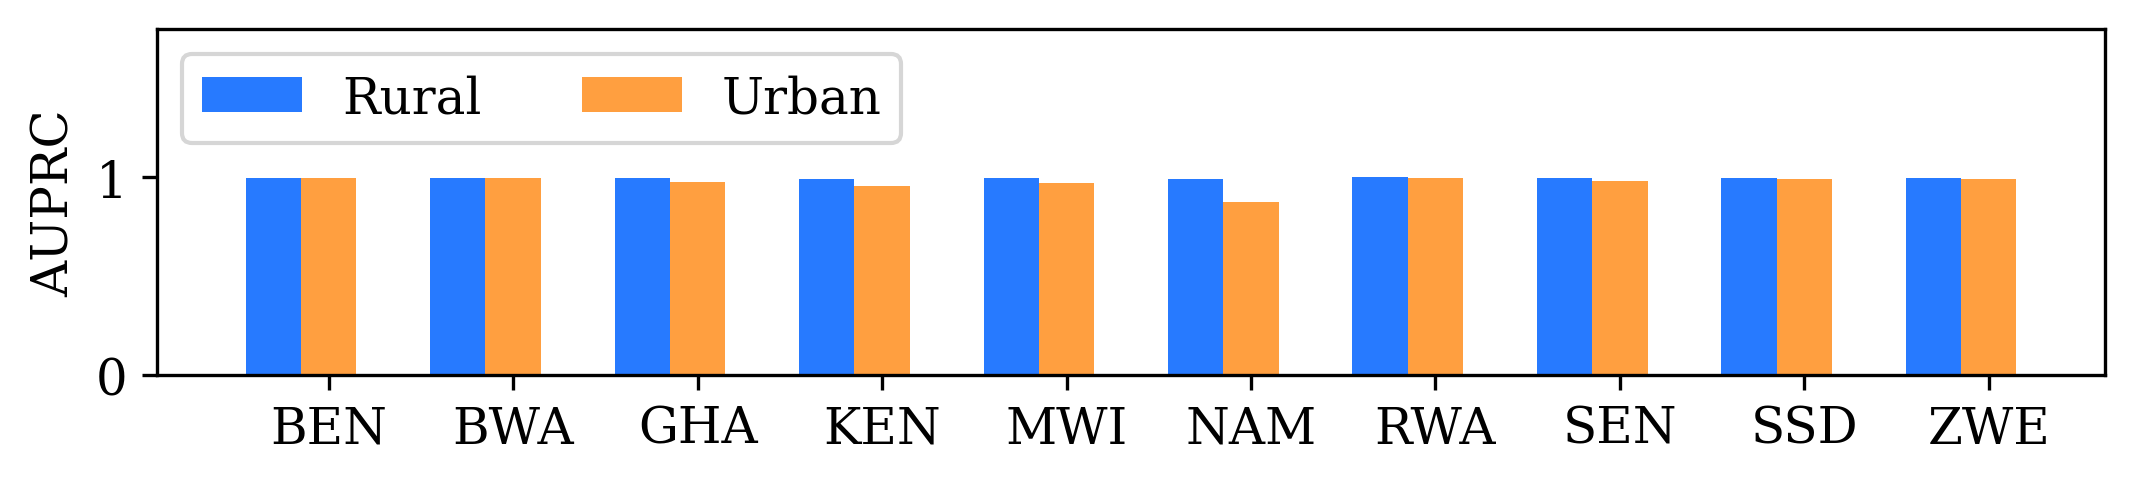

In [4]:
model_config = config_utils.create_config(model_config_file)
plot_utils.plot_rurban(model_config)

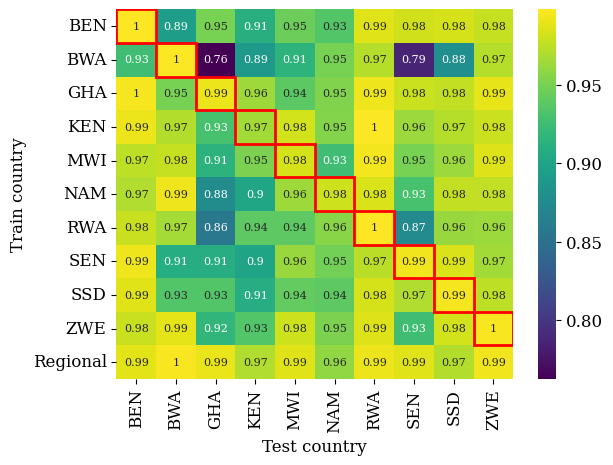

In [13]:
model_config = config_utils.create_config(model_config_file)
exp_dir = os.path.join(os.getcwd(), "cv")
plot_utils.plot_heatmap(model_config, exp_dir)

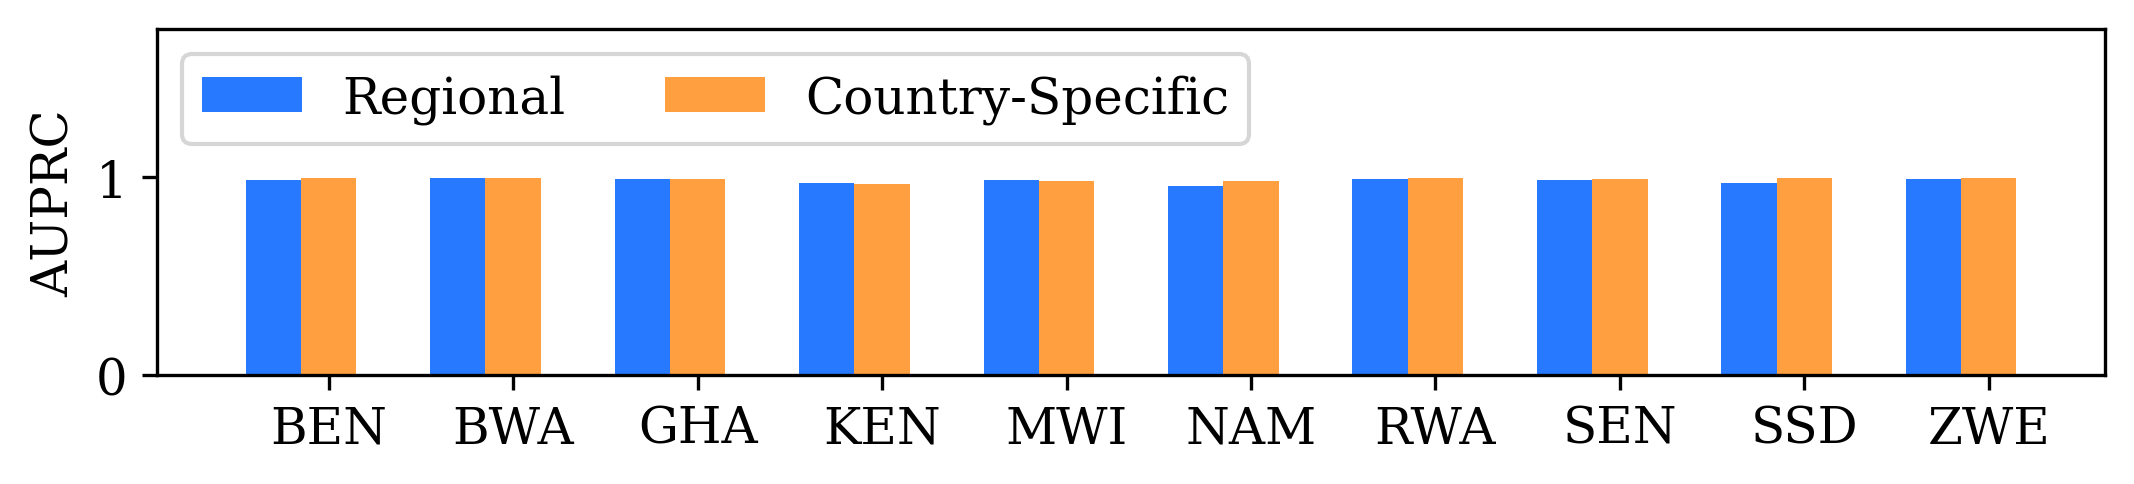

In [15]:
plot_utils.plot_regional_vs_country(config);

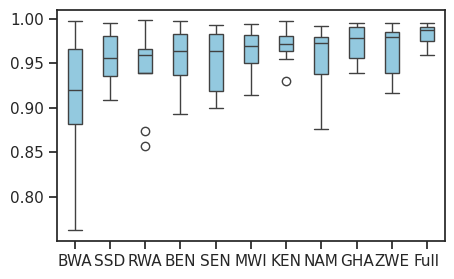

In [14]:
grouped = data.T.median().sort_values()
sns.set(style="ticks", rc={"figure.figsize": (5, 3)}) 
sns.boxplot(data.T, color="skyblue", widths=0.4, order=grouped.index);

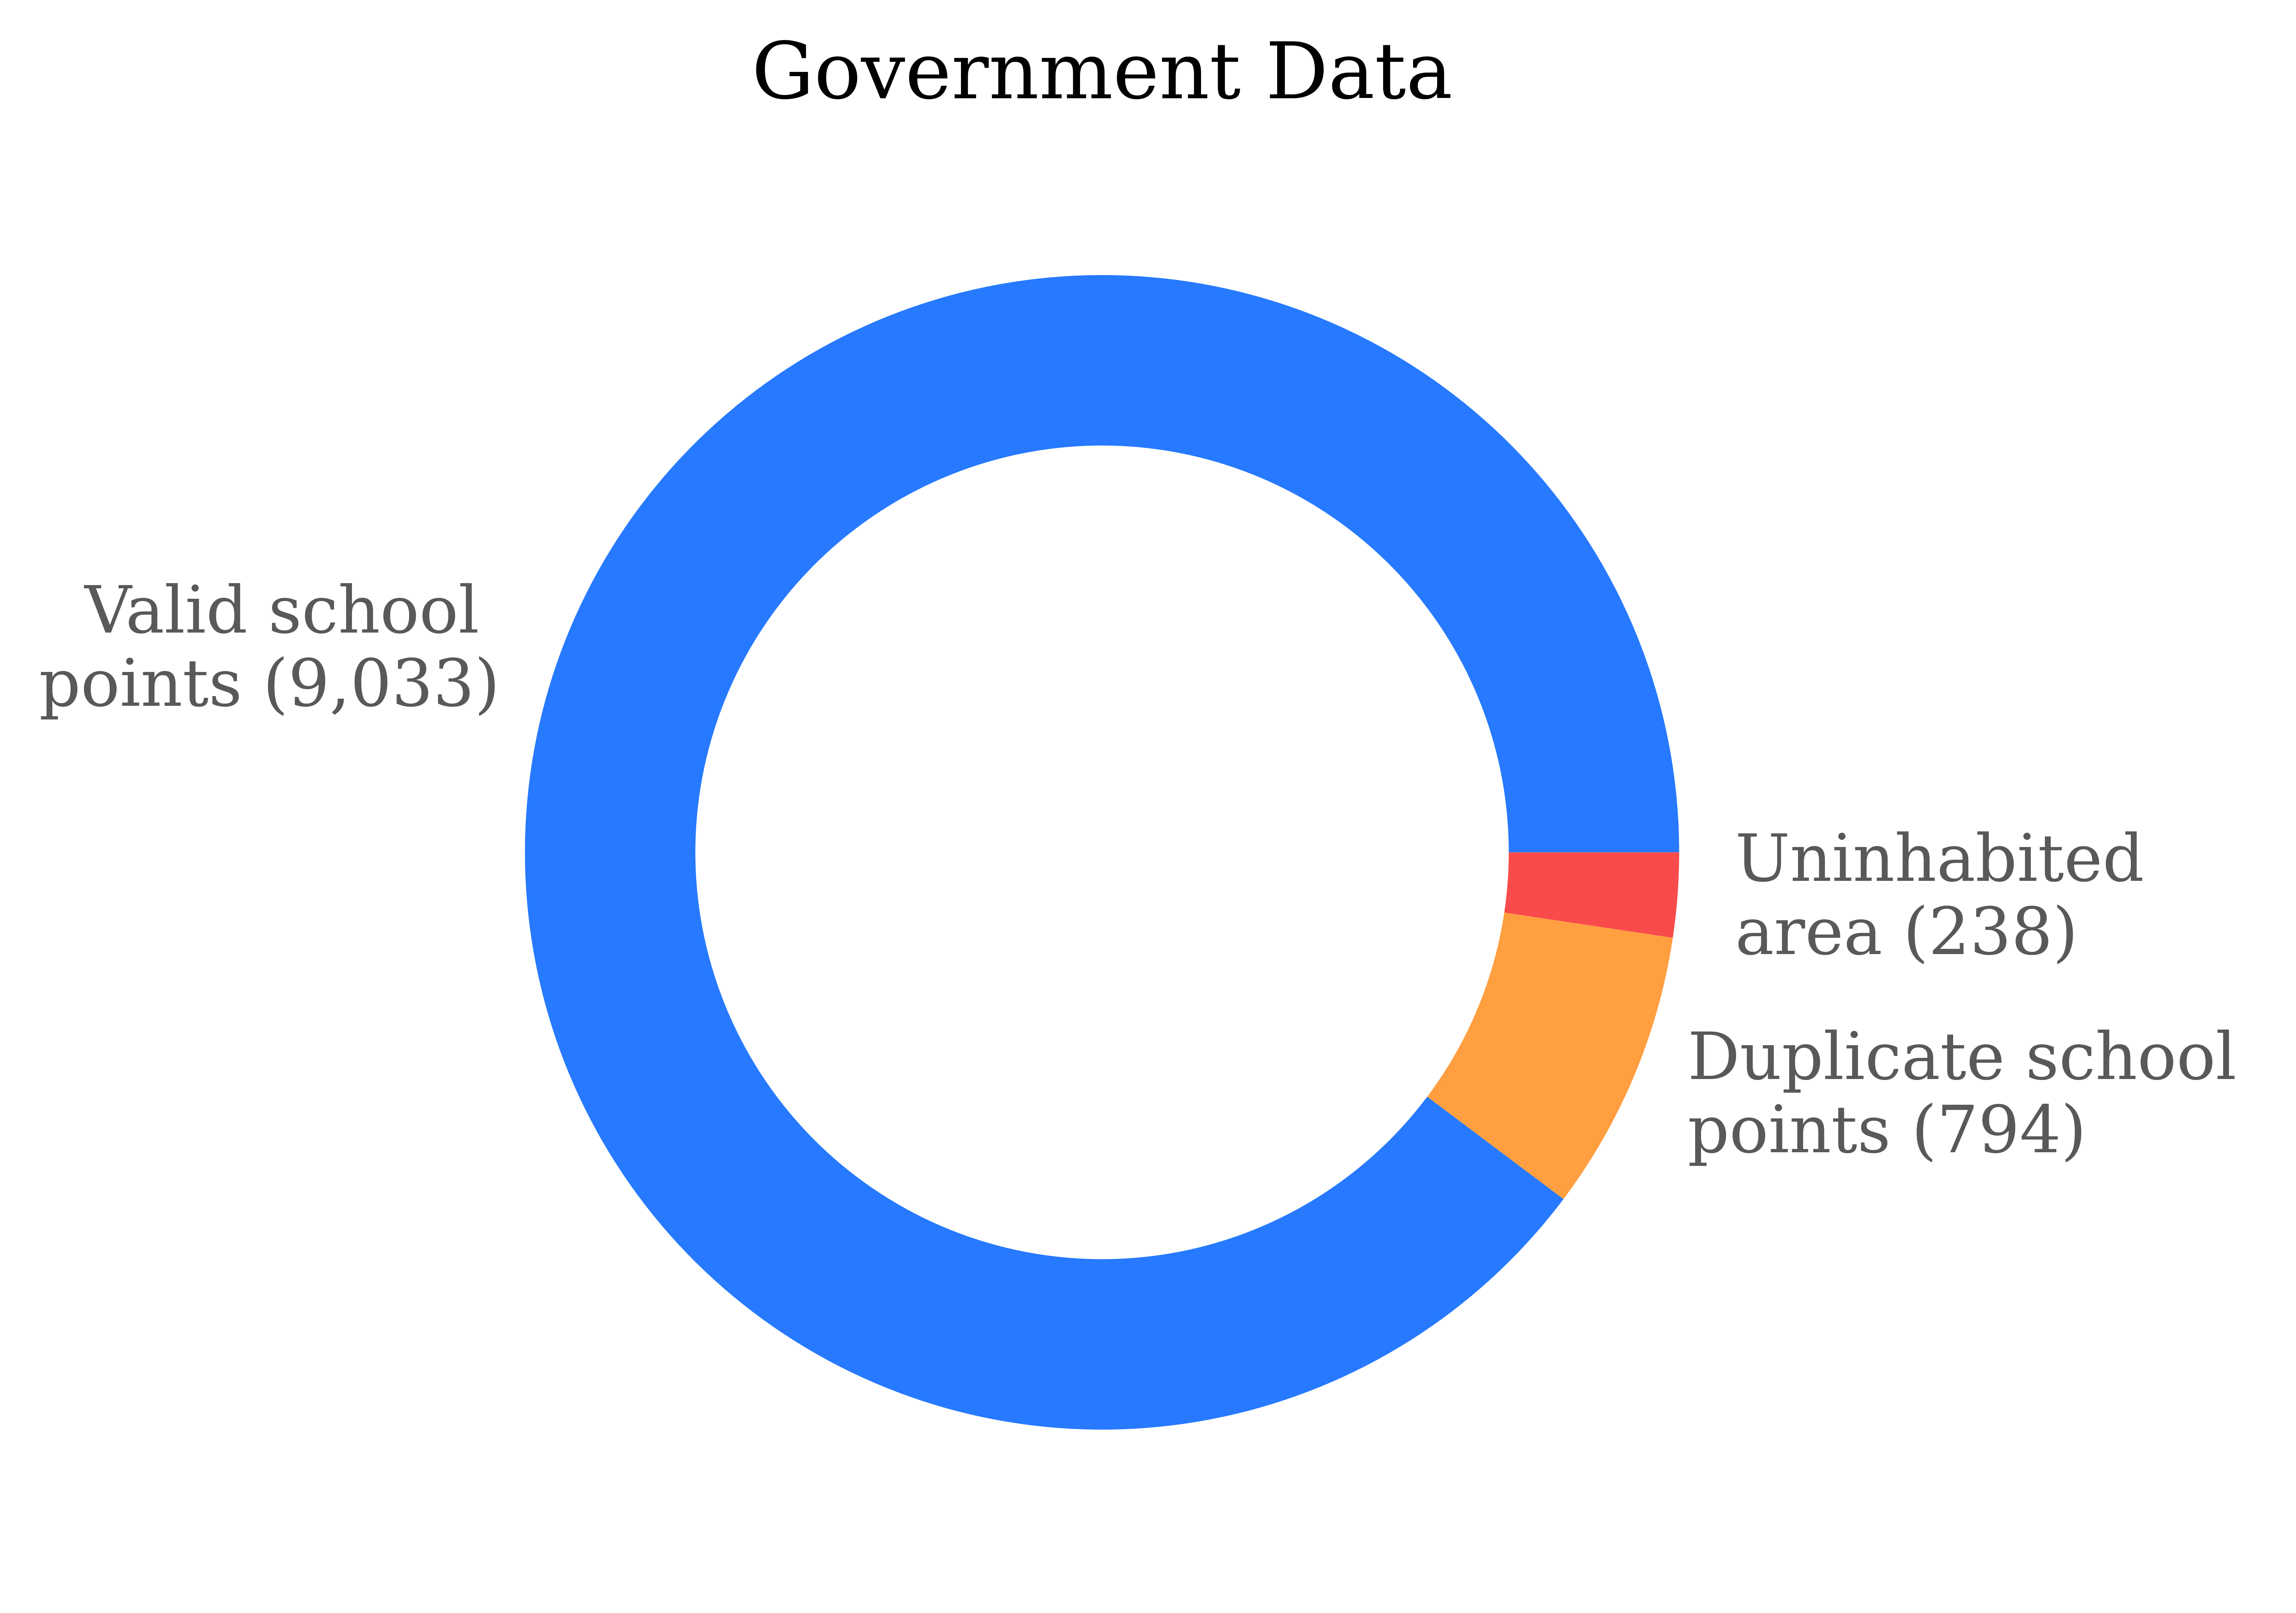

In [8]:
plot_utils.plot_pie_chart(master, source="master")

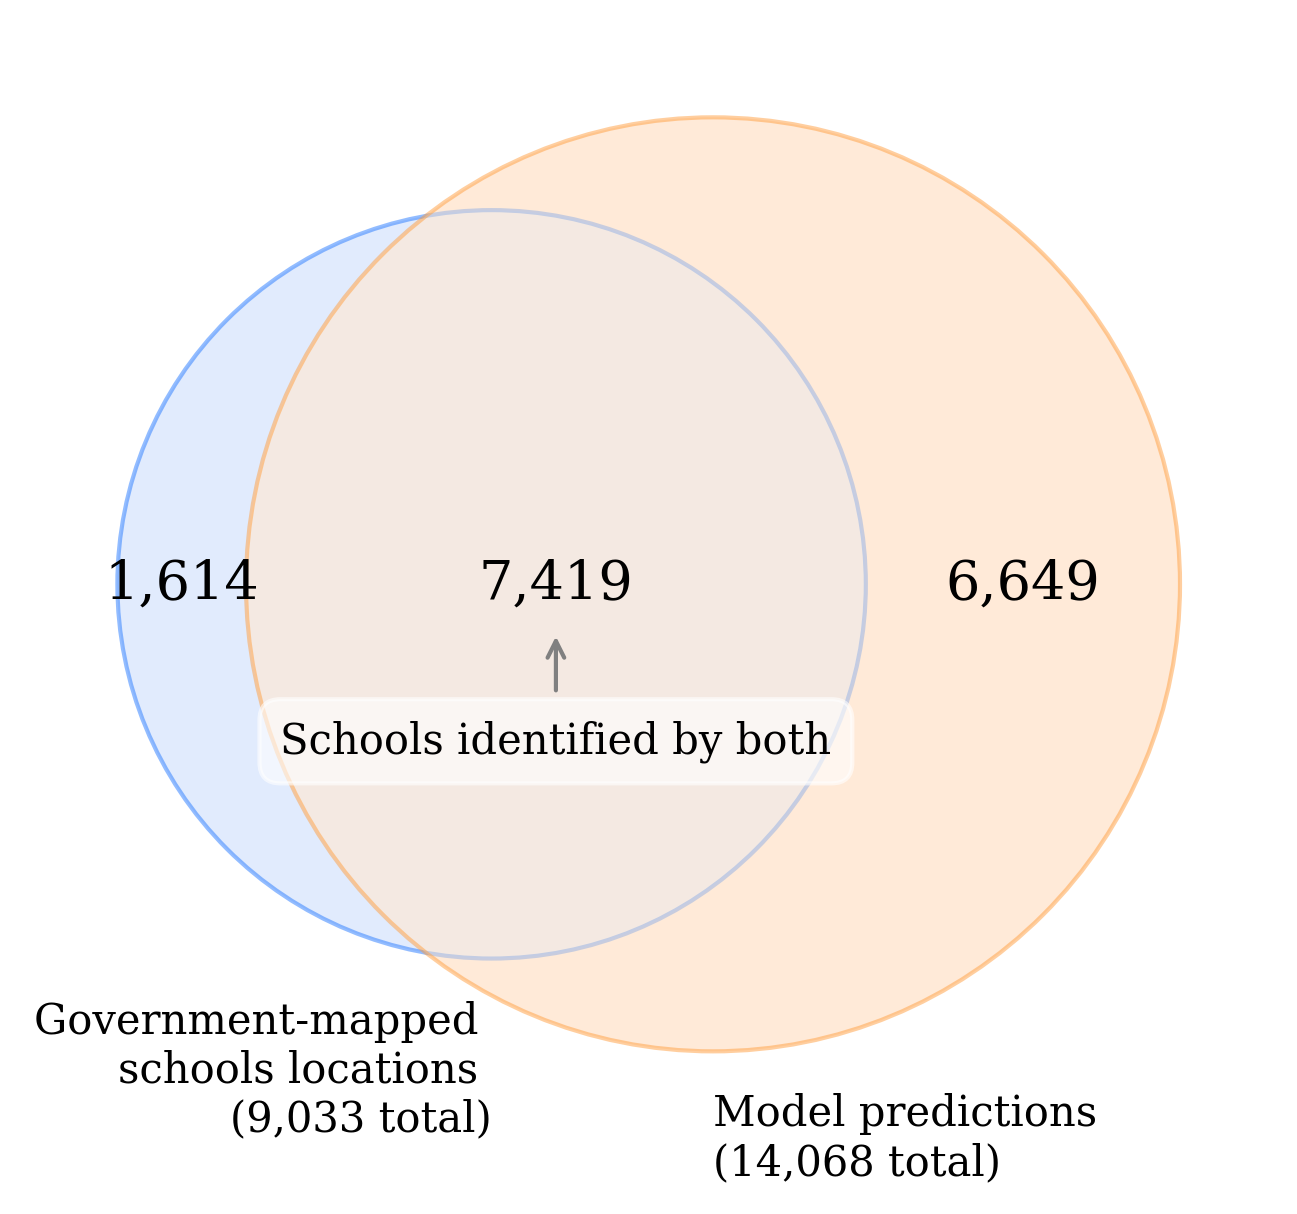

In [10]:
plot_utils.plot_venn_diagram(master[master["clean"] == 0], preds, threshold_dist=250)

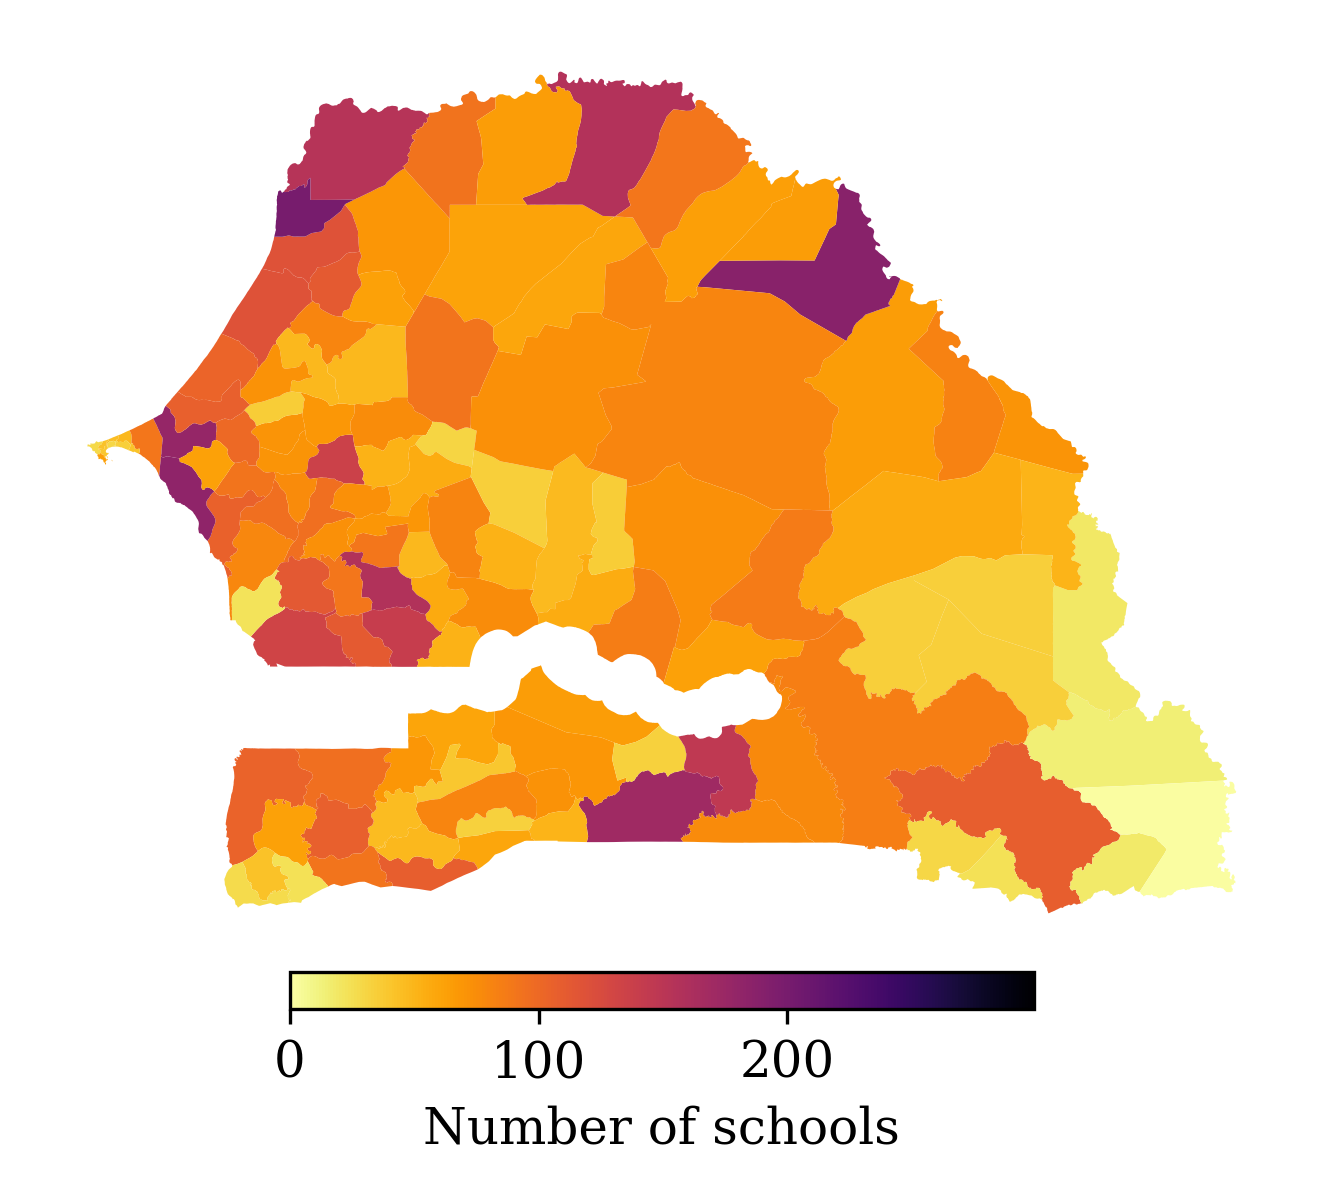

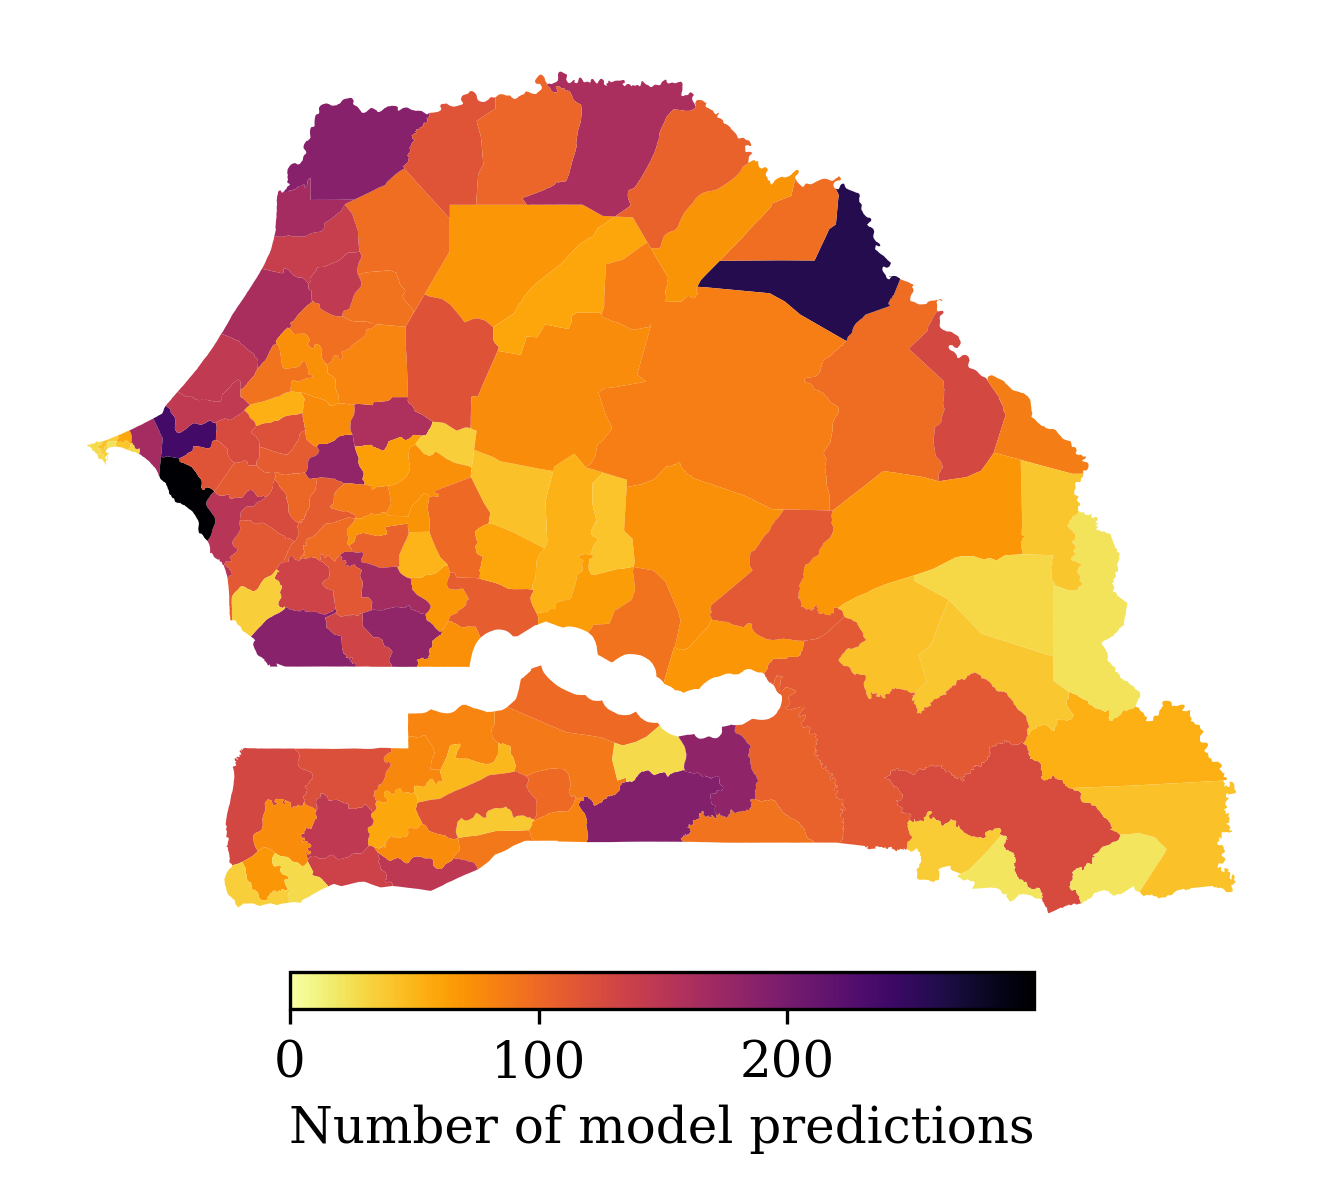

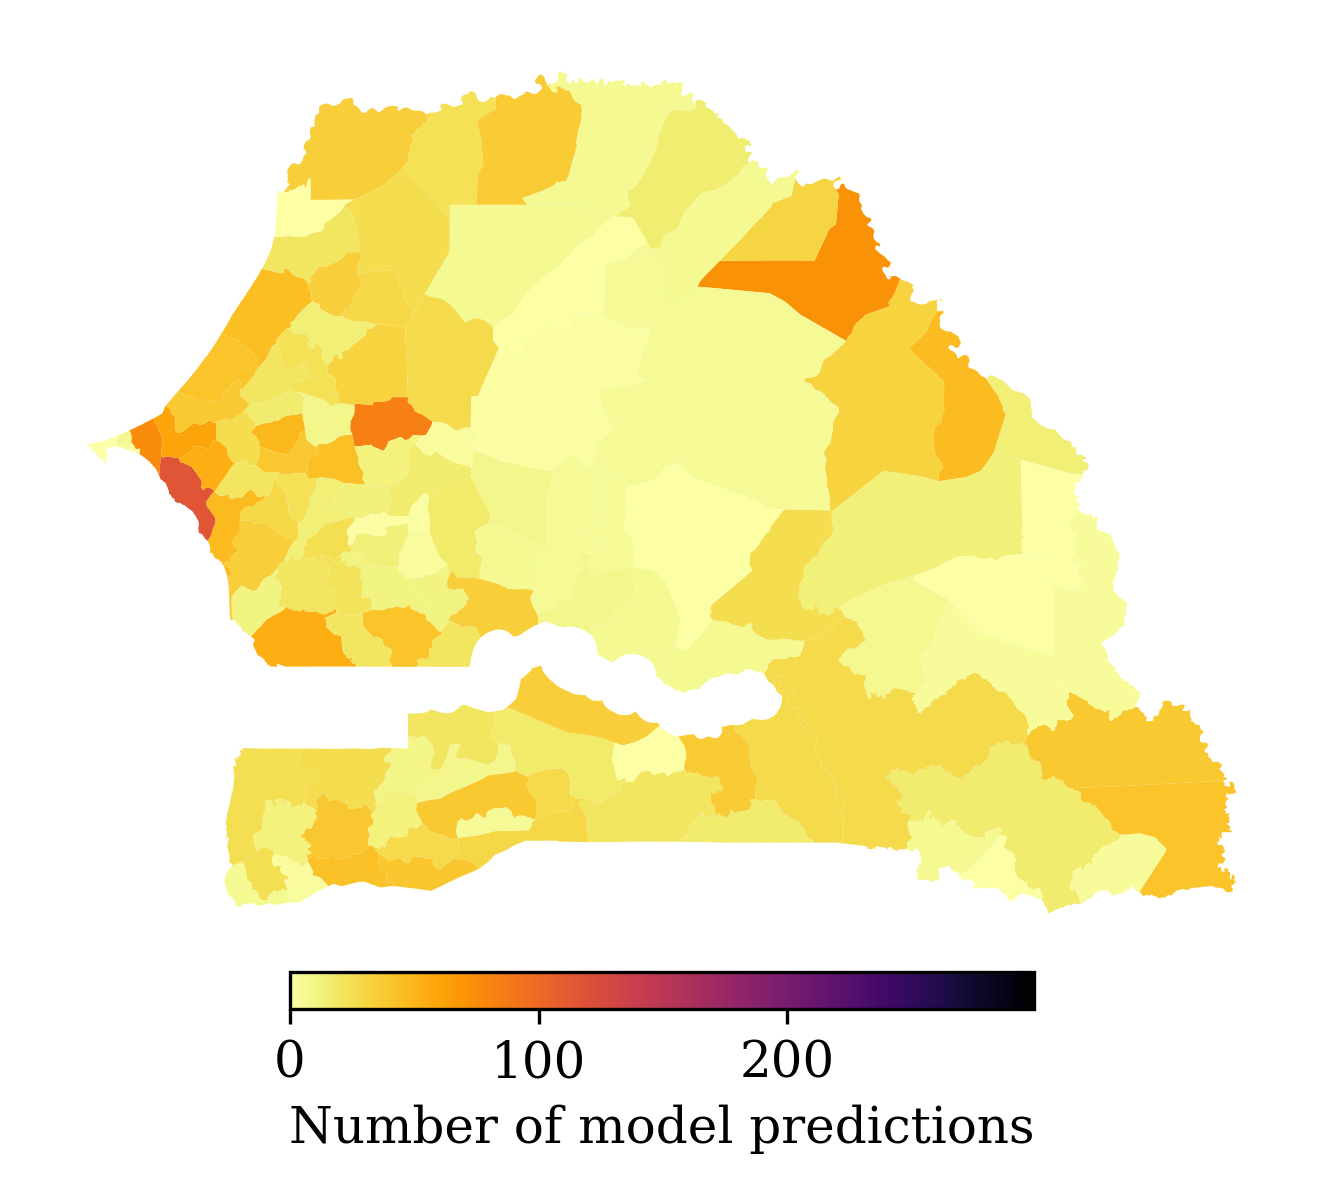

In [61]:
plot_utils.plot_choropleth(master, preds[preds.prob > 0.5], data_config, iso_code, threshold_dist=250, adm_level="ADM3")

Text(0.5, 0, 'Probability Threshold')

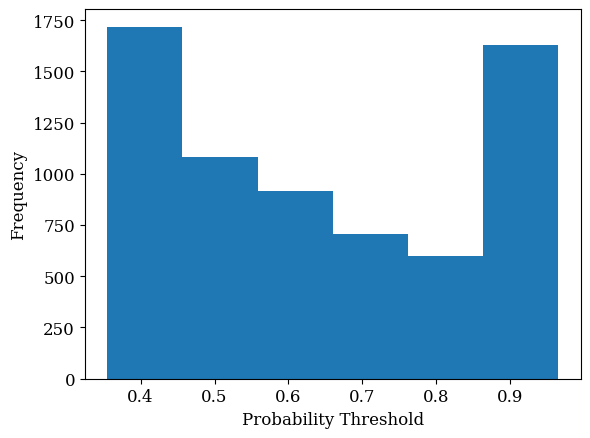

In [14]:
(
    master_filtered,
    preds_filtered,
    intersection,
    master_unconfirmed,
    preds_unconfirmed,
) = plot_utils.calculate_stats(master, preds, threshold_dist=250)
ax = preds_unconfirmed["prob"].plot.hist(bins=6)
ax.set_xlabel("Probability Threshold")